## Quiz Evaluasi Materi Basic Python Programming

In [105]:
# Python version check
import platform
print(platform.python_version())

3.6.4


### Library

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Dataset

**Original data source** : https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

**Summary**  
Dataset contains daily count of rental bikes between years 2011 in Capital bikeshare system with the corresponding weather and seasonal information, provided in two separated table (bike and weather).Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.User is able to easily rent a bike from a particular position and return back at another position.

**Dictionary 'weather'**  
datetime = date (format dd-mm-yy)  
season = musim (Spring, Summer, Fall, Winter)  
weather = cuaca (Clear, Cloudy, Light Snow)  
temp = temperature, degC  
hum = humidity, %  
windspeed = kecepatan angin, km/h  

**Dictionary 'bike'**  
datetime = date (format dd-mm-yy)  
casual = banyaknya bikesharing casual-user (non-member)  
registered = banyaknya bikesharing casual-user (member)

### Data Import & Quicklook

In [117]:
bike = pd.read_csv("bike.csv")
weather = pd.read_csv("weather.csv")

In [118]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
date          365 non-null object
casual        365 non-null int64
registered    365 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.6+ KB


In [119]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
date         365 non-null object
season       365 non-null object
weather      365 non-null object
temp         365 non-null float64
hum          365 non-null float64
windspeed    365 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.2+ KB


In [120]:
bike.head(3)

,date,casual,registered
0,01-01-11,331,654
1,02-01-11,131,670
2,03-01-11,120,1229


In [121]:
weather.head(3)


,date,season,weather,temp,hum,windspeed
0,01-01-11,Spring,Cloudy,34.4167,80.5833,10.749882
1,02-01-11,Spring,Cloudy,36.3478,69.6087,16.652113
2,03-01-11,Spring,Clear,19.6364,43.7273,16.636703


## Part 1

1.Tambahkan 1 kolom baru pada tabel 'bike' dengan nama kolom 'total', berisi jumlah casual-user dan registered-user

In [122]:
# Answer 1
bike['total'] = bike['casual'] + bike['registered']

2.Tambahkan 1 kolom baru pada tabel 'weather' dengan nama kolom 'day' yang berisi nama hari berdasarkan tanggal pada kolom 'date'. Clue: Cara seperti exercise data 'pet' pada materi Python Programming 2 

In [123]:
bike['date'] = pd.to_datetime(bike['date'])

In [124]:
# Answer 2
weather['date'] = pd.to_datetime(weather['date'])
weather['day'] = weather['date'].dt.weekday_name


3.Lakukan konversi unit temperature dari degC menjadi degF. Gunakan fungsi lambda

In [125]:
# Answer 3
weather['temp'] = list(map(lambda x : x*9/5+32,weather['temp'] ))
weather['temp']

0       93.950060
1       97.426040
2       67.345520
3       68.000000
4       72.852260
5       68.782640
6       67.373960
7       61.700000
8       56.899940
9       59.149940
10      62.436380
11      63.090860
12      61.700000
13      60.956600
14      73.999940
15      73.700060
16      63.649940
17      71.000060
18      84.591320
19      79.100060
20      63.950000
21      42.643472
22      49.373906
23      49.530434
24      72.226040
25      71.150000
26      67.100000
27      68.626040
28      67.373960
29      70.973960
          ...    
335     88.550060
336     85.850060
337     91.549940
338    101.449940
339    115.250000
340    105.800000
341     79.849940
342     84.349940
343     81.500000
344     71.749940
345     74.899940
346     82.850000
347     89.150000
348    108.050000
349     99.500000
350     78.499940
351     74.899940
352     81.800060
353    101.449940
354    109.099940
355    108.199940
356     99.199940
357     86.450000
358     81.460940
359     89

4.Gabungkan data 'weather' dan data 'bike' berdasar tanggal yang bersesuaian

In [126]:
# Answer 4
data = pd.merge(bike,weather,how='inner',on='date')
data.head(10)


,date,casual,registered,total,season,weather,temp,hum,windspeed,day
0,2011-01-01,331,654,985,Spring,Cloudy,93.95006,80.5833,10.749882,Saturday
1,2011-02-01,131,670,801,Spring,Cloudy,97.42604,69.6087,16.652113,Tuesday
2,2011-03-01,120,1229,1349,Spring,Clear,67.34552,43.7273,16.636703,Tuesday
3,2011-04-01,108,1454,1562,Spring,Clear,68.00000,59.0435,10.739832,Friday
4,2011-05-01,82,1518,1600,Spring,Clear,72.85226,43.6957,12.522300,Sunday
5,2011-06-01,88,1518,1606,Spring,Clear,68.78264,51.8261,6.000868,Wednesday
6,2011-07-01,148,1362,1510,Spring,Cloudy,67.37396,49.8696,11.304642,Friday
7,2011-08-01,68,891,959,Spring,Cloudy,61.70000,53.5833,17.875868,Monday
8,2011-09-01,54,768,822,Spring,Clear,56.89994,43.4167,24.250650,Thursday
9,2011-10-01,41,1280,1321,Spring,Clear,59.14994,48.2917,14.958889,Saturday


5.Pada musim dan cuaca apa bikesharing a)Paling banyak digunakan, b)Paling sedikit digunakan

In [142]:
# Answer 5
#a
x = data.groupby(['season','weather']).sum()[['total']].sort_values(by='total',ascending=False)
print(x.head(1))
print(x.tail(1))


                 total
season weather        
Fall   Clear    309150
                   total
season weather          
Spring Light Snow   1129


6.Tampilkan informasi nilai maximum dan nilai minimum dari variable 'temp', 'hum' dan 'winspeed' untuk setiap kategori musim

In [165]:
# Answer 6
print(data.groupby('season')['temp','hum','windspeed'].max())
print(data.groupby('season')['temp','hum','windspeed'].min())
# data.describe()

             temp      hum  windspeed
season                               
Fall    184.85006  93.9565  25.166339
Spring  129.20000  94.8261  34.000021
Summer  177.49994  92.2500  26.000489
Winter  148.85006  97.2500  28.292425
              temp      hum  windspeed
season                                
Fall    116.450060  39.6250   5.459106
Spring   42.643472   0.0000   3.042356
Summer   77.547740  30.2174   5.000712
Winter   71.749940  41.0000   1.500244


7.Buat plot untuk memvisualisasikan hubungan antara temp (unit degF) dengan total pengguna bikesharing. Customize plot dengan ukuran, judul, pilihan warna, label yang sesuai agar lebih informatif. 

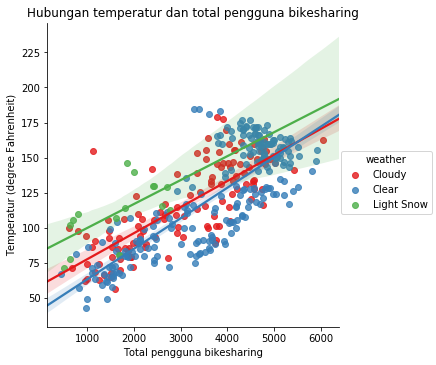

In [179]:
# Answer 7
sns.lmplot(x='total', y = 'temp', data=data,palette='Set1',hue='weather') #linear model plot. Linear model + regresi
plt.title('Hubungan temperatur dan total pengguna bikesharing')
plt.ylabel('Temperatur (degree Fahrenheit)')
plt.xlabel('Total pengguna bikesharing')
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

8.Tampilkan dengan grafik (barplot) jumlah pengguna bikesharing untuk setiap kategori musim. Urutkan dari kiri ke kanan mulai dari frekuensi tertinggi.

In [191]:
# Answer 8
# [answer]
g = data.groupby('season').sum()
urutbymusim = g.sort_values(by = 'total', ascending = False).reset_index()
urutbymusim

,season,casual,registered,total,temp,hum,windspeed
0,Fall,95450,324200,419650,14871.857960,6059.9627,1116.685355
1,Summer,77564,269752,347316,11791.228780,6055.6247,1268.413414
2,Winter,52813,273324,326137,9679.639360,6177.7842,1002.571886
3,Spring,21425,128575,150000,7311.161052,5200.3924,1293.080778


Text(0.5,0,'Musim')

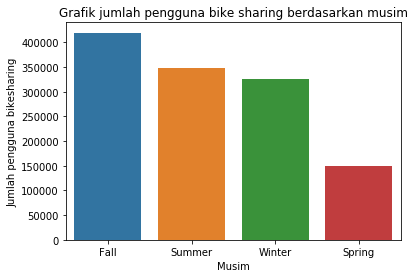

In [193]:
sns.barplot(x = 'season',y='total', data=urutbymusim)
plt.title('Grafik jumlah pengguna bike sharing berdasarkan musim')
plt.ylabel('Jumlah pengguna bikesharing')
plt.xlabel('Musim')

9.Cara untuk menampilkan histogram dari data pandas menggunakan matplotlib adalah 
  
a.	plt.histogram(x,bins = 15)  
b.	plt.bucket(x,bins = 15)  
c.	plt.hist(x,bins = 15)  
d.	plt.bar(x,bins = 15)  
e.	plt.his(x,bins = 15)  


# Answer 9
### C. plt.hist(x,bins = 15)


10.Cara untuk menampilkan scatterplot dan garis regresi menggunakan seaborn adalah  
  
a.	sns.regression  
b.	sns.lmplot  
c.	sns.linearregression  
d.	sns.scatterplot  
e.	sns.lmreg  


# Answer 10
### B. sns.lmplot

11.Kota tempat tinggal pemain sepak bola merupakan tipe variable  
  
a.	Rating  
b.	Ratio  
c.	Nominal  
d.	Continuous  
e.	Ordinal


# Answer 11
### C. Nominal

12.Untuk menempatkan label atau tulisan atau tanda panah dalam visualisasi dapat menggunakan method  
  
a.	Legend  
b.	Arrow  
c.	Label  
d.	Text  
e.	Annotate


# Answer 12
### E. Annotate

13.Yang termasuk dalam style yang dapat digunakan dalam matplotlib  
  
a.	gplot  
b.	blackandwhite  
c.	sephia  
d.	gray  
e.	ggplot  


# Answer 13
### E. ggplot

## Part 2

1.Jelaskan perbedaan dari exploratory dan explanatory dari sisi visualisasi

Exploratory yaitu cara mencari tau karakteristik dan gambaran data secara detail dan lebih cocok diperuntukan bagi data scientist. Visualisasi exploratory lebih fokus pada plot plot yang menampilkan data dari sgei statistik deskriptif untuk mengetahui tahapan pengolahan hubungan data.

Explanatory merupakan teknik visualisasi data yang diperuntukkan bagi orang umum, yang mudah dipahami sehingga didapatkan informasi atau kesimpulan dari data tersebut. Explanatory fokus pada visualisasi dan style yang menarik tetapi juga mudah dipahami (pie chart, barplot). Bahkan pada tahap ini bisa juga menampilkan teks kesimpulan.

2.Jelaskan factor apa saja yang perlu dipertimbangkan dalam memilih visualisasi atau plot apa yang ingin ditampilkan dalam tahap exploration

Plot : memilih plot yang sesuai dengan karakter dan gambaran umum data. 


Karakteristik data : seberapa banyak, jenis dan tipe data yang akan diolah. Karena, setiap tipe data memiliki grafik atau visualisasi yang berbeda-beda. 


Tujuan : dalam proses visualisasi, tidak semua data perlu digunakan. Hanya data-data tertentu yang memiliki keterkaitan dengan tujuan yang perlu digunakan dan diolah


Hipotesis : Kita perlu memiliki pandangan atau gambaran awal dari tadi sebelum melakukan visualisasi

3.Buat 1 grafik Time series yang menampilkan banyaknya pengguna bikesharing dari 1-Jan-2011 sampai 31-Des-2011. Ingin diketahui juga komposisi banyaknya casual-user dan registered user. Clue: 1)Gunakan data 'casual' dan 'registered', bukan data 'total. 2)Opsi menggunakan area plot

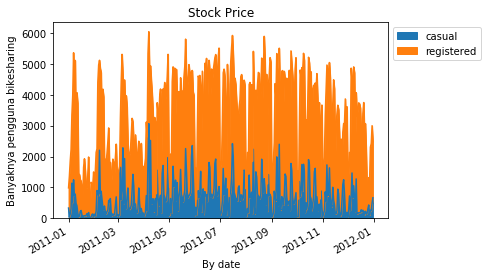

In [206]:
# answer 3
# data.set_index('date',inplace=True)
data[['casual','registered']].plot.area(title= 'Stock Price')
plt.ylabel('Banyaknya pengguna bikesharing')
plt.xlabel('By date')
plt.legend(bbox_to_anchor=(1,1))
plt.show()